In [24]:
import pandas as pd 

data = pd.read_csv('mapkickstarter/MasterKickstarter.csv')
data.head()

,Unnamed: 0,X1,X1_1,Country,City,id,name,blurb,goal,pledged,...,Backers_as_Prct_of_Pop_YM,Backers_as_Prct_of_Pop_Y,Days_spent_making_campign,Days_inception_to_Deadline,Backers_in_city_Y,Backers_in_city_YM,All_Time_Backers_city,Mean_Pledge_City,Mean_pledge_city_Y,Mean_pledge_city_YM
0,1,1,1,AUS,Adelaide,1337161279,"Worlds & Creatures, the Art of Anthony Christou",A 100 page Artbook featuring the work of Antho...,5000.0,16081.00,...,0.020015,0.044034,21,59,473,215,1672,3124.0,2975.532222,215.0
1,2,2,2,AUS,Adelaide,1533913565,Pheonician Entertainment Productions,"Wordsmith! The story of good vs Evil, Hero vs ...",5500.0,257.00,...,0.000465,0.044034,22,62,473,5,1672,3124.0,2975.532222,2.5
2,3,3,3,AUS,Adelaide,1666009607,The Postnatalist - Second issue comic book,The Postnatalist explores feminist issues invo...,300.0,353.12,...,0.000838,0.000931,3,48,10,9,1672,3124.0,94.440000,4.5
3,4,4,4,AUS,Adelaide,1759296231,Alkandros: Futurewear 3000 Square Sunglasses; ...,Alkandros Designs is interested in being diffe...,5000.0,90.00,...,0.000279,0.044034,84,144,473,3,1672,3124.0,2975.532222,3.0
4,5,5,5,AUS,Adelaide,458085213,School of the Road: Autism and Adventure Docum...,A feature length documentary and educational s...,100000.0,16272.56,...,0.009310,0.044034,68,103,473,100,1672,3124.0,2975.532222,100.0


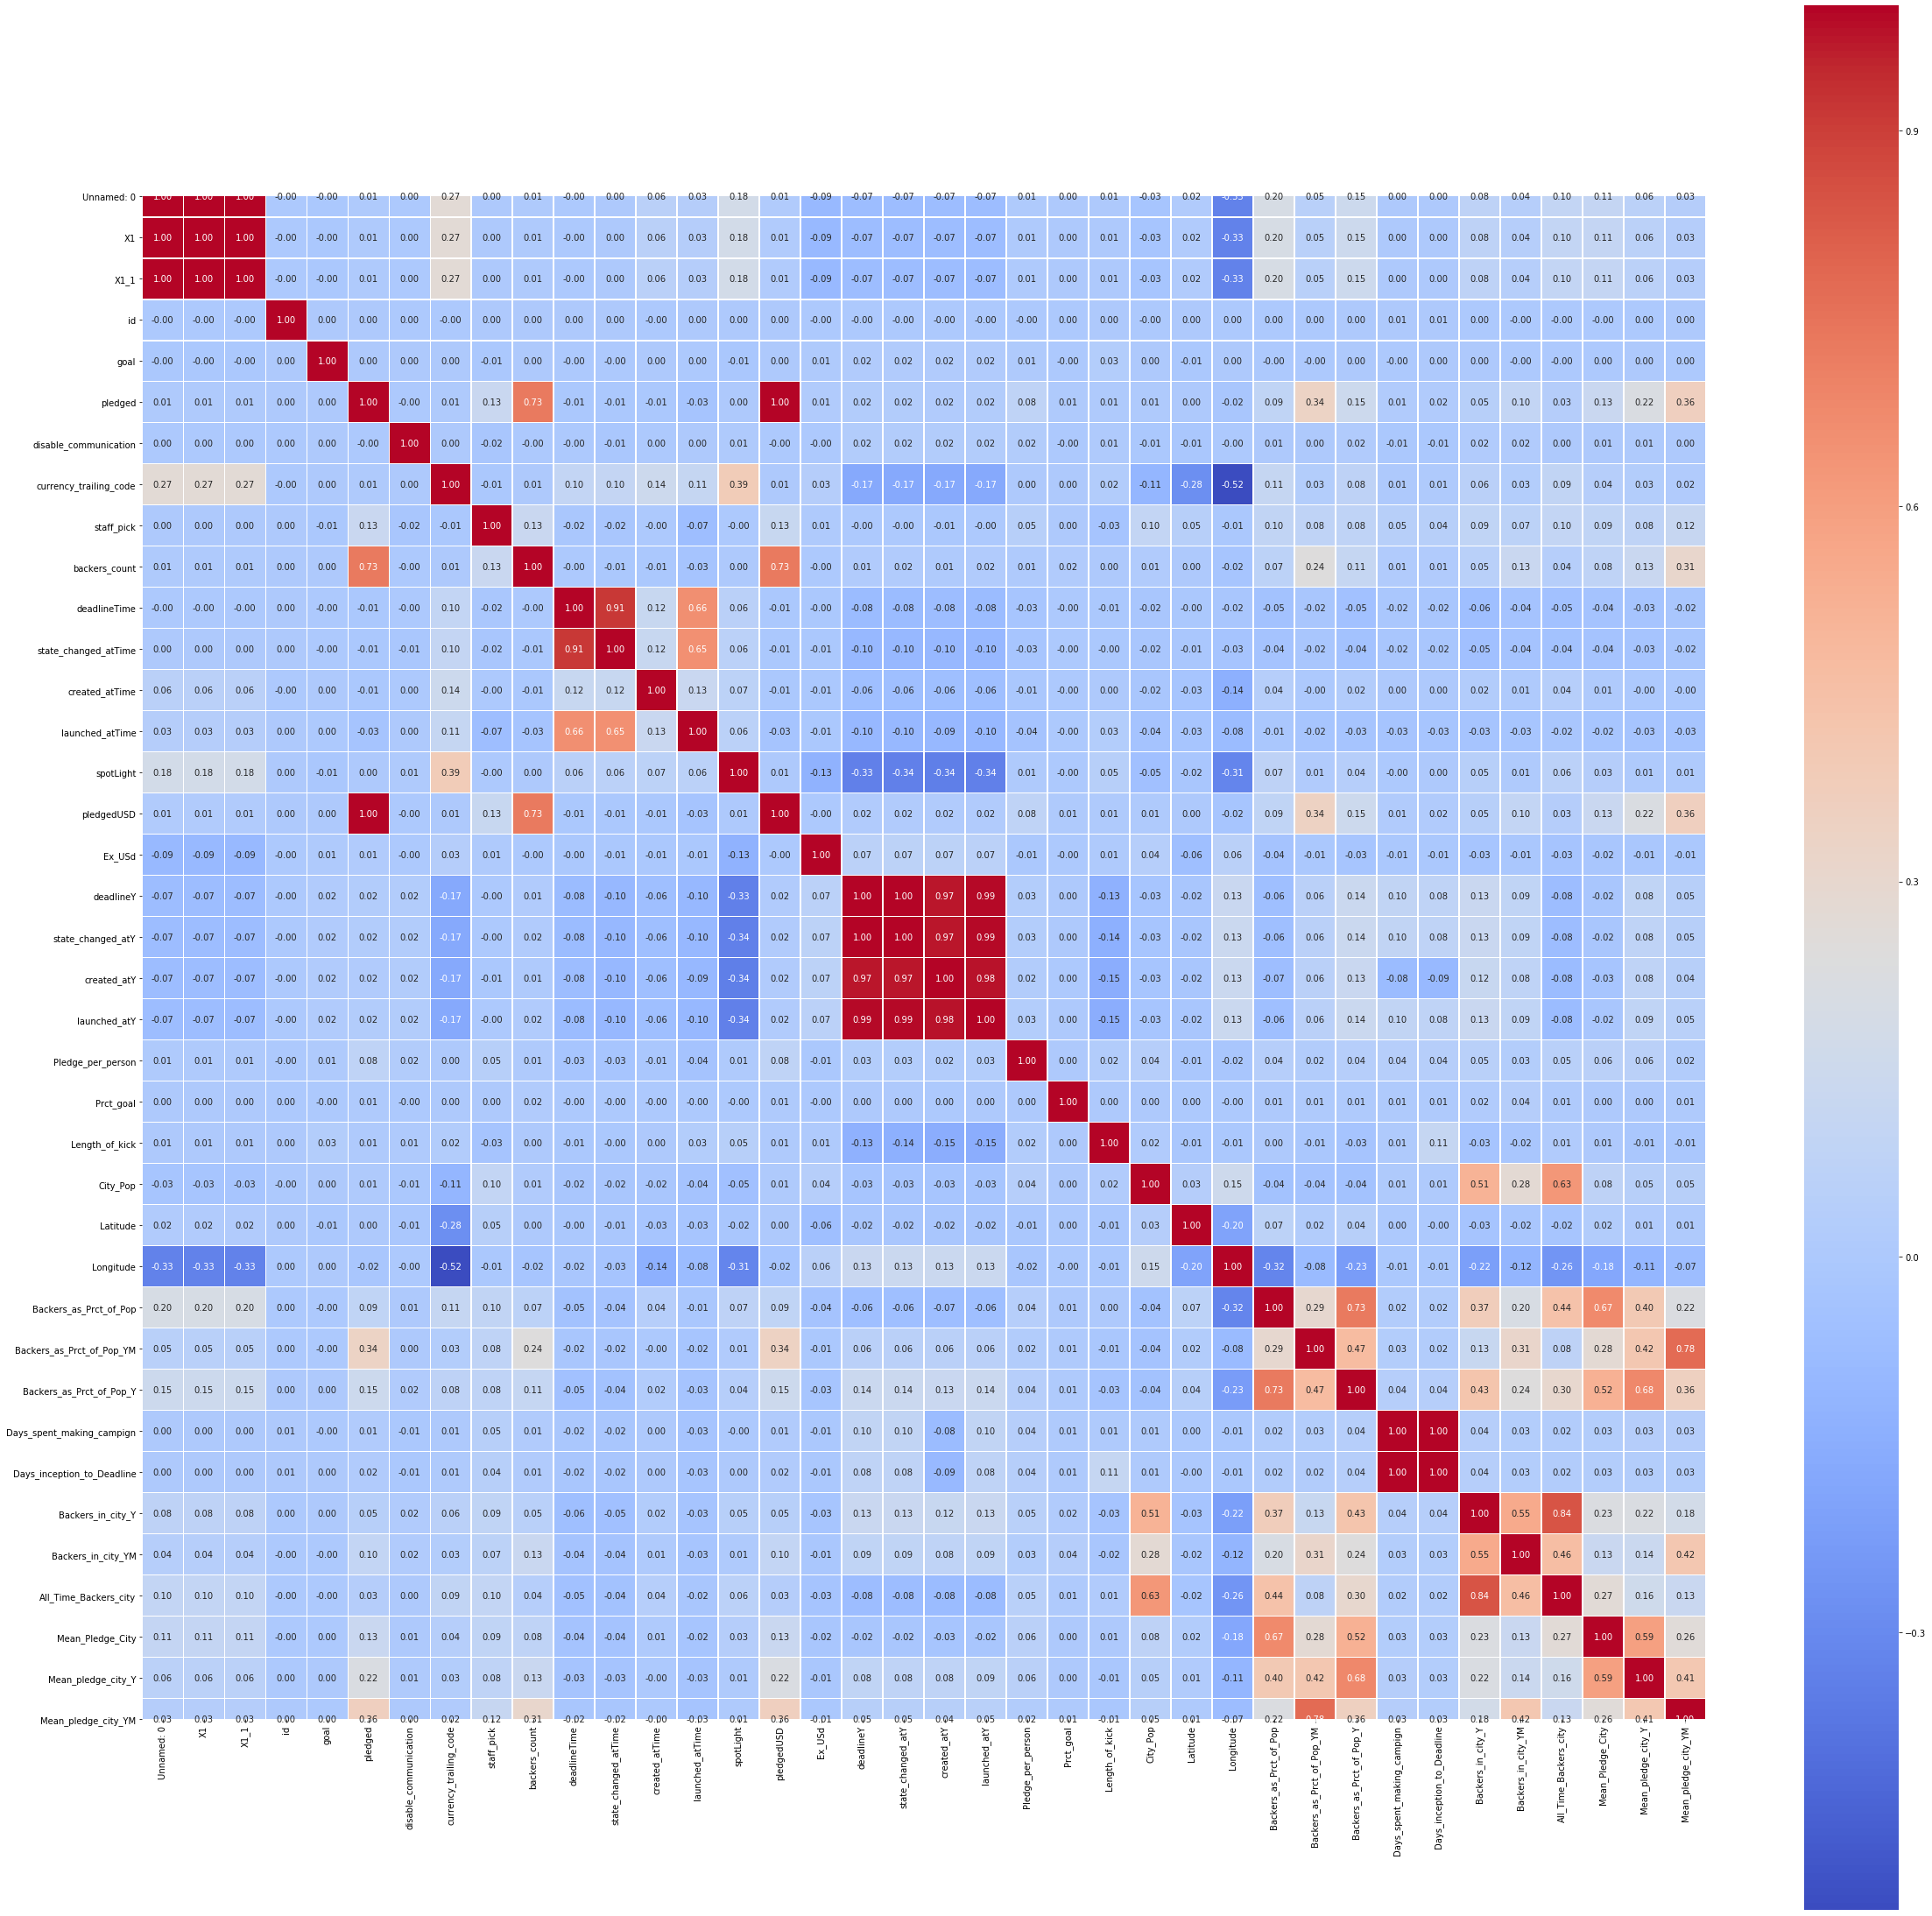

In [22]:
data.fillna(0)
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


plt.figure(figsize=(40, 40)) 
corr = data.corr()
h1 = sns.heatmap(corr, square=True, linewidths=.5, annot=True, fmt='.2f', cmap='coolwarm')
plt.savefig("h1.png")

In [25]:
data1 = data.drop(['Unnamed: 0', 'X1', 'X1_1', 'disable_communication', 'currency', 'currency_symbol', 'currency_trailing_code', 'pledgedUSD', 'Prct_goal', 'Backers_as_Prct_of_Pop', 'Backers_as_Prct_of_Pop_YM', 'Backers_as_Prct_of_Pop_Y', 'Days_inception_to_Deadline','deadlineY',
       'state_changed_atY', 'created_atY', 'launched_atY'], axis = 1)
data1.columns

Index(['Country', 'City', 'id', 'name', 'blurb', 'goal', 'pledged', 'status',
       'slug', 'deadline', 'state_changed_at', 'created_at', 'launched_at',
       'staff_pick', 'backers_count', 'deadlineTime', 'state_changed_atTime',
       'created_atTime', 'launched_atTime', 'Categories', 'spotLight',
       'Ex_USd', 'deadlineYM', 'state_changed_atYM', 'created_atYM',
       'launched_atYM', 'Pledge_per_person', 'Length_of_kick', 'City_Pop',
       'Latitude', 'Longitude', 'County', 'State', 'Days_spent_making_campign',
       'Backers_in_city_Y', 'Backers_in_city_YM', 'All_Time_Backers_city',
       'Mean_Pledge_City', 'Mean_pledge_city_Y', 'Mean_pledge_city_YM'],
      dtype='object')

In [10]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data1 = data.drop(['Unnamed: 0', 'X1', 'X1_1'], axis = 1)
success_d = data1[data1.status == 'successful']
failed_d = data1[data1.status == 'failed']
data2 = pd.concat([success_d, failed_d])
data2.head()

,Country,City,id,name,blurb,goal,pledged,status,slug,disable_communication,...,Backers_as_Prct_of_Pop_YM,Backers_as_Prct_of_Pop_Y,Days_spent_making_campign,Days_inception_to_Deadline,Backers_in_city_Y,Backers_in_city_YM,All_Time_Backers_city,Mean_Pledge_City,Mean_pledge_city_Y,Mean_pledge_city_YM
0,AUS,Adelaide,1337161279,"Worlds & Creatures, the Art of Anthony Christou",A 100 page Artbook featuring the work of Antho...,5000.0,16081.00,successful,worlds-and-creatures-the-art-of-anthony-christou,False,...,0.020015,0.044034,21,59,473,215,1672,3124.0,2975.532222,215.0
2,AUS,Adelaide,1666009607,The Postnatalist - Second issue comic book,The Postnatalist explores feminist issues invo...,300.0,353.12,successful,the-postnatalist-second-issue-comic-book,False,...,0.000838,0.000931,3,48,10,9,1672,3124.0,94.440000,4.5
9,AUS,Adelaide,664443090,Dragon Dreaming - drawing in a world of silence.,Profoundly deaf contemporary indigenous artist...,5000.0,5265.00,successful,dragon-dreaming-drawing-in-a-world-of-silence,False,...,0.005027,0.005027,17,47,54,54,1672,3124.0,3913.880000,54.0
10,AUS,Adelaide,513705868,Oh Brother mini-comic: growing up with a broth...,A 32-page A5 colour mini-comic collection of a...,100.0,2260.00,successful,oh-brother-mini-comic-growing-up-with-a-brothe...,False,...,0.011358,0.044034,48,57,473,122,1672,3124.0,2975.532222,61.0
15,AUS,Adelaide,1392677430,The Binary Project | Robin Eley gives away a p...,Own part of a Robin Eley painting for FREE (+p...,7000.0,19875.50,successful,the-binary-project-robin-eley-gives-away-a-pai...,False,...,0.095888,0.105663,11,41,1135,1030,1672,3124.0,6335.670000,1030.0


In [ ]:
train_x.columns

In [ ]:
train_x1 = train_x.drop(['id', 'pledged', 'disable_communication', 'currency','currency_symbol', 'currency_trailing_code', 'pledgedUSD', 'deadlineYM', 'state_changed_atYM', 'created_atYM', 'launched_atYM', 'Pledge_per_person', 'Prct_goal', 'Backers_as_Prct_of_Pop', 'Backers_as_Prct_of_Pop_YM', 'Backers_as_Prct_of_Pop_Y'], axis = 1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
corr = train_x1.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(20,20)
    
plt.show()

In [ ]:
train_x2 = train_x1.drop(['state_changed_atTime', 'launched_atTime', 'state_changed_atY', 'created_atY', 'launched_atY', 'Backers_in_city_Y', 'All_Time_Backers_city', 'Days_inception_to_Deadline', 'Mean_pledge_city_Y', 'Mean_pledge_city_YM'], axis = 1)

In [ ]:
train_x2.columns

In [ ]:
train_x2['len_name'] = train_x2.name.str.len()
train_x2['word_name'] = train_x2.name.apply(lambda w: len(str(w).split(' ')))
#x['exclamation'] = (x.name.str[-1] == '!').astype(int)
#x['question'] = (x.name.str[-1] == '?').astype(int)
train_x2['word_name_radio'] = train_x2.word_name / train_x2.len_name

train_x2['len_blurb'] = train_x2.blurb.str.len()
train_x2['word_blurb'] = train_x2.blurb.apply(lambda w: len(str(w).split(' ')))
#x['exclamation'] = (x.name.str[-1] == '!').astype(int)
#x['question'] = (x.name.str[-1] == '?').astype(int)
train_x2['word_blurb_radio'] = train_x2.word_blurb / train_x2.len_blurb

name = train_x2.name
train_x2 = train_x2.drop(['name','blurb'], axis = 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

cat_list = ['Country','City', 'status', 'staff_pick', 'Categories', 'spotLight', 'County', 'State']
labelencoder_x = LabelEncoder()
for i in cat_list:
    train_x2[i] = labelencoder_x.fit_transform(train_x2[i])

In [ ]:
train_x2.head()

In [ ]:
train_x2.isnull().sum()

In [ ]:
Ex_USd_mean = train_x2['Ex_USd'].mean()
mpc = train_x2['Mean_Pledge_City'].mean()

train_x2['Ex_USd'] = train_x2['Ex_USd'].fillna(value = Ex_USd_mean)
train_x2['Mean_Pledge_City'] = train_x2['Mean_Pledge_City'].fillna(value = mpc)

train_x2.isnull().sum()
#train_x3 = train_x2.dropna(axis = 0)
#train_x3.isnull().sum()

In [ ]:
train_x3 = train_x2.dropna()
train_x3.isnull().sum()

In [ ]:
print(train_x2.shape, train_x3.shape)

In [ ]:
train_x3['goal_USD'] = train_x3['goal'] / train_x3['Ex_USd']

train_x3 = train_x3.drop(['goal', 'Ex_USd'], axis = 1)

for col in train_x3.columns:
    if train_x3[col].dtypes != object:
        train_x3[col] = train_x3[col].apply(lambda x: int(x))

In [ ]:
train_x3.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
corr1 = train_x3.corr()
g1 = sns.heatmap(corr1,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')

sns.despine()
g1.figure.set_size_inches(40,40)
    
plt.show()

In [ ]:
train_x3 = train_x3.drop(['len_name', 'word_name', 'len_blurb', 'word_blurb'], axis = 1)

In [ ]:
train_x4 = train_x3.drop('slug', axis = 1)
train_x4.head()

In [ ]:
train_x3['len_name'] = data.name.str.len()
data['word_name'] = data.name.apply(lambda w: len(str(w).split(' ')))
#x['exclamation'] = (x.name.str[-1] == '!').astype(int)
#x['question'] = (x.name.str[-1] == '?').astype(int)
data['word_name_radio'] = data.word_name / data.len_name

data['len_blurb'] = data.blurb.str.len()
data['word_blurb'] = data.blurb.apply(lambda w: len(str(w).split(' ')))
#x['exclamation'] = (x.name.str[-1] == '!').astype(int)
#x['question'] = (x.name.str[-1] == '?').astype(int)
data['word_blurb_radio'] = data.word_blurb / data.len_blurb

name = data.name
data = data.drop(['name','blurb'], axis = 1)

In [ ]:
data.columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

cat_list = ['Country','staff_pick', 'Categories', 'spotLight', 'State']
labelencoder_x = LabelEncoder()
for i in cat_list:
    data[i] = labelencoder_x.fit_transform(data[i])

In [ ]:
data.isnull().sum()

In [ ]:
train_x4.columns

In [ ]:
for col in ['goal_USD', 'backers_count', 'Length_of_kick', 'City_Pop', 'Days_spent_making_campign', 'Backers_in_city_YM']:
    train_x4[col] = (train_x4[col] - train_x4[col].mean()) / (train_x4[col].max() - train_x4[col].min())

In [ ]:
train_x4.head()

In [ ]:
dl = []
sl = []
cl = []
ll = []

for i, row in train_x4.iterrows():
    temp1 = ''
    temp2 = ''
    temp3 = ''
    temp4 = ''
    temp1 += row[3][:2] + row[3][3:5] + row[3][6:]
    temp2 += row[4][:2] + row[4][3:5] + row[4][6:]
    temp3 += row[5][:2] + row[5][3:5] + row[5][6:]
    temp4 += row[6][:2] + row[6][3:5] + row[6][6:]
    dl.append(temp1)
    sl.append(temp2)
    cl.append(temp3)
    ll.append(temp4)

In [ ]:
train_x4['deadline'] = dl
train_x4['state_changed_at'] = sl
train_x4['created_at'] = cl
train_x4['launched_at'] = ll
train_x4 = train_x4.drop('launchd_at', axis = 1)
train_x4.head()

In [ ]:
deadlineYM = []
launched_atYM = []
for i, row in data.iterrows():
    temp1 = ''
    temp2 = ''
    temp1 += row[7][:2] + row[7][3:]
    temp2 += row[8][:2] + row[8][3:]
    deadlineYM.append(temp1)
    launched_atYM.append(temp2)

In [ ]:
data['deadlineYM'] = deadlineYM
data['launched_atYM'] = launched_atYM
data.head()

In [ ]:
data.columns

In [ ]:
data.isnull().sum()

In [ ]:
sub_data1 = data[['goal', 'backers_count', 'Length_of_kick', 'City_Pop', 'Days_spent_making_campign', 'Backers_in_city_Y', 'word_blurb_radio', 'word_name_radio']]
sub_data2 = data.drop(['goal', 'backers_count', 'Length_of_kick', 'City_Pop', 'Days_spent_making_campign', 'Backers_in_city_Y', 'word_blurb_radio', 'word_name_radio'], axis = 1)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
sub_x = pd.DataFrame(min_max_scaler.fit_transform(sub_data1), columns = ['goal', 'backers_count', 'Length_of_kick', 'City_Pop', 'Days_spent_making_campign', 'Backers_in_city_Y', 'word_blurb_radio', 'word_name_radio'])


In [ ]:
sub_data1.head()

In [ ]:
sub_data2.head()

In [ ]:
sub_data2.shape

In [ ]:
sub_x.head()

In [ ]:
sub_x.shape

In [ ]:
X = pd.concat([sub_data2, sub_x], axis = 1,sort = False)
X.head()

In [ ]:
X.shape

In [ ]:
X.isnull().sum()

In [ ]:
nX = X.dropna(axis = 0)
nX.shape

In [ ]:
X = data.drop(['status','len_name','len_blurb','word_name', 'word_blurb'], axis = 1)
y = data.status


In [ ]:
X.head()

In [ ]:
X = train_x4.drop('status', axis = 1)
Y = train_x4.status

In [ ]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

SVM_classifier = SVC() 
SVM_classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix

Y_pred = SVM_classifier.predict(X_test)

print('SVM classification report \n',classification_report(y_test, Y_pred))
print('SVM confusion_matrix \n',confusion_matrix(y_test, Y_pred),'\n')
print('SVM accuracy is', accuracy_score(Y_pred, y_test))

In [ ]:
x.shape[0]

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=30)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 10 best features

In [ ]:
data1 = data1.drop(['Unnamed: 0', 'X1', 'X1_1', 'currency_symbol', 'currency_trailing_code','disable communication', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'deadlineYM', 'state_changed_atYM', 'created_atYM', 'launched_atYM'], axis = 1)
data1.head()

In [ ]:
data1.columns

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

successful_name = data1[data1.status == 'successful']['name'].values
wordcloud = WordCloud(background_color='white').generate(str(successful_name))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
failure_name = data1[data1.status == 'failed']['name'].values
wordcloud1 = WordCloud(background_color='white').generate(str(failure_name))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df

In [ ]:
data2 = pd.read_csv('mapkickstarter/Mapping.csv')
data2.head()

In [ ]:
data3 = pd.read_csv('mapkickstarter/County.csv')
data3.head()